###  1 Language: Python

All numerical code should be written in Python.

In [2]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.optimize import root
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

### 2. The number $N$

For me the number $N$ is $72$.

In [3]:
N=72

### 3. Existence but not uniqueness

Consider the BVP (Boundary Value Problem):
$$
y^{\prime} = \sqrt{|y|}, \quad y(0)=0
$$


#### Analytical Solution


For the $y<0$:
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{-y} \\
(-y)^{-\frac{1}{2}} \frac{d y}{d x}=1 \\
-2 \sqrt{-y}=x+c \\
-4 y=(x+c)^2 \\
y=-\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=-\frac{x^2}{4}
$$

for $y>0$
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{y} \\
(y)^{-\frac{1}{2}} y^{\prime}=1 \\
2 y^{\frac{1}{2}}=x+c \\
y^{\frac{1}{2}}=\frac{1}{2}(x+c) \\
y=\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=\frac{x^2}{4}
$$

***Coments***
1. **Existence of Multiple Solutions**: 
- The differential equation $y' = \sqrt{|y|}$ with the initial condition $y(0) = 0$ has multiple solutions. 
- This is evident from the analytical solutions we derived for both $y < 0$ and $y > 0$. 
- This behavior is characteristic of non-linear differential equations, where the existence of a solution is guaranteed, but uniqueness is not.

2. **Symmetry**: 
- The solutions $y(x) = -\frac{x^2}{4}$ for $y < 0$ and $y(x) = \frac{x^2}{4}$ for $y > 0$ are symmetric about the x-axis. 
- This is expected given the absolute value in the differential equation, which makes the equation symmetric about the y-axis.

3. **Boundary Behavior**: 
- The solution approaches $y = 0$ as $x$ approaches 0 from both the positive and negative sides. 
- This is consistent with the given boundary condition $y(0) = 0$.

#### Numerical Solution

*I like RK4 it seemed like the best one due to its accuracy and stability.*

In [4]:
def rk_4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_values = [t_start]
    v_values = [y0]
    
    while t_values[-1] < t_stop:
        k1 = f(t_values[-1], v_values[-1])
        k2 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k1)
        k3 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k2)
        k4 = f(t_values[-1] + h, v_values[-1] + h * k3)
    
        t_next = t_values[-1] + h
        y_next = v_values[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        t_values.append(t_next)
        v_values.append(y_next)

    return t_values, v_values

In [5]:
def rk_4_for_problem3(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_value = [t_start]
    y_value = [y0]
    sample_t = []
    sample_y = []
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)
        
        if y_next > 1e-4:
            break
        
        if abs(y_next) < 1e-4:
            sample_t.append(t_next)
            sample_y.append(y_next)
    
    return sample_t, sample_y

In [6]:
# Define the function
def f(t, y):
    return np.sqrt(abs(y))

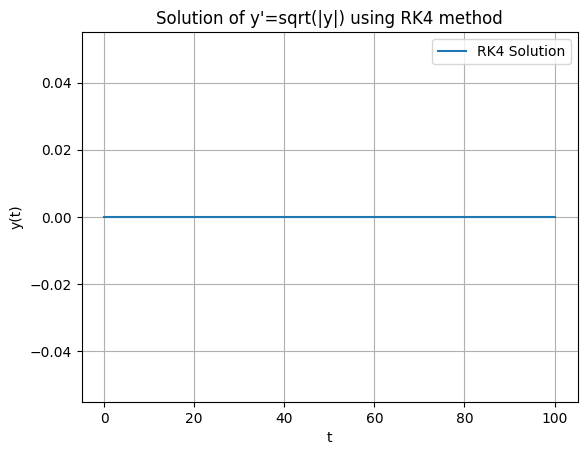

In [7]:
t_start = 0
y0 = 0
t_stop = 100
N = 1000
h = (t_stop - t_start) / N

t, y = rk_4(f, 0, 0, t_stop, h)

plt.plot(t, y, label='RK4 Solution')
plt.title("Solution of y'=sqrt(|y|) using RK4 method")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
t_start = -1
y_plus_epsilon = -1 + 1e-10
t_stop = 10
h = (t_stop - t_start) / N

t, y = rk_4_for_problem3(f, y_plus_epsilon, t_start, t_stop, h)
print(f"stuck at y = 0 between {round(t[1], 3)} and {round(t[-1], 3)}")

stuck at y = 0 between 1.002 and 1.013


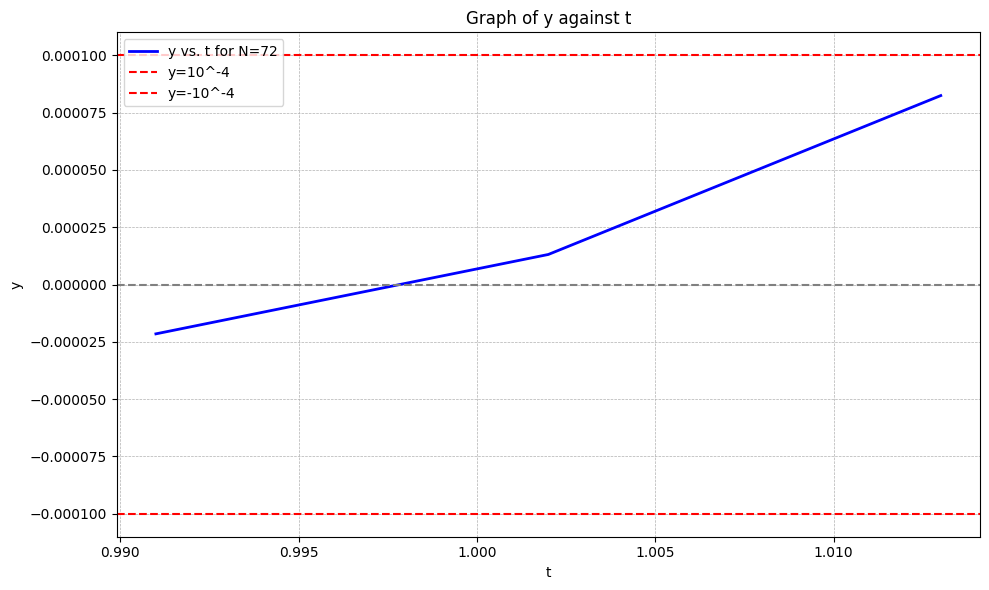

In [9]:
#Plot
plt.figure(figsize=(10, 6))
plt.title('Graph of y against t')
plt.plot(t, y, color='blue', linestyle='-', linewidth=2, label='y vs. t for N=72')

# Add horizontal lines for zero & tolerance
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1e-4, color='red', linestyle='--', label="y=10^-4")
plt.axhline(-1e-4, color='red', linestyle='--', label="y=-10^-4")

plt.xlabel('t')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

***Numerical Comments***

1. **RK4 Method**: 
- For problems with non-unique solutions (like this one), the numerical method might converge to one of the possible solutions based on the initial condition and step size.

2. **Straight Line in First Plot**: 
- The first plot showing a straight line indicates that the numerical solution remains at $y = 0$ for the given range of $t$. 
- This is one of the valid solutions to the differential equation, but it's not the only one.

3. **Sensitivity to Initial Conditions**: 
- Small perturbation `y_plus_epsilon = -1 + 1e-10` to the initial condition. 
- This results in the solution deviating from $y = 0$. 
- This behavior highlights the sensitivity of the differential equation to initial conditions, especially near the boundary $y = 0$.

4. **Stuck at $y = 0$**: 
- The output "stuck at y = 0 between 1.002 and 1.013" indicates that the solution approaches $y = 0$ within this interval. 
- This behavior is consistent with the analytical solution, where $y$ approaches 0 as $x$ approaches 0.

### 4. PANG

Betrakta BVP
$$
y^{\prime}=y^2, \quad y(0)=N / 100
$$

#### Analytical Solution


$$
y' = y^2
$$

$$
\frac{dy}{y^2} = dt
$$

$$
\int \frac{dy}{y^2} = \int dt
$$

$$
-\frac{1}{y} = t + C
$$

$$
-\frac{1}{\frac{N}{100}} = C
$$

$$
C = -\frac{100}{N}
$$

$$
-\frac{1}{y} = t - \frac{100}{N}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

The solution "blows up" when the denominator is zero:
$$
100 - Nt = 0
$$
$$
t = \frac{100}{N}
$$

#### Numerical Solution

In [10]:
def rk_4_for_problem4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        # I define this arbitrary value 1e6 to stop the loop as blowing up
        if y_next > 1e10:
            break
        
        t_value.append(t_next)
        y_value.append(y_next)
    
    return t_value, y_value

In [11]:
# Define the function
def f(t,y):
    return y**2

***Simple numerical simulation of the differential equation $y^{\prime}=y^2$***

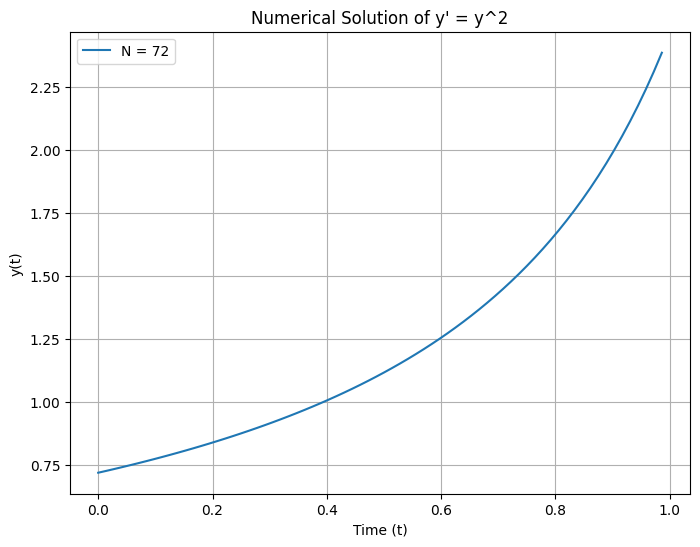

In [12]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 1
h = (t_stop - t_start) / N

# Return evenly spaced numbers over a specified interval.
t_values = np.arange(0, t_stop, h)
y_values = []

#Kick off the loop
y = y0

for t in t_values:
    y_values.append(y)
    y += h * y**2
    # I define this arbitrary value 1e50 to stop the loop as blowing up
    if abs(y) > 1e50:
        print("Solution is growing too rapidly. Stopping integration.")
        break

t_values = t_values[:len(y_values)]

plt.figure(figsize=(8, 6))
plt.plot(t_values, y_values, label=f'N = {N}')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Numerical Solution of y\' = y^2')
plt.legend()
plt.grid(True)
plt.show()



***Blowing up***

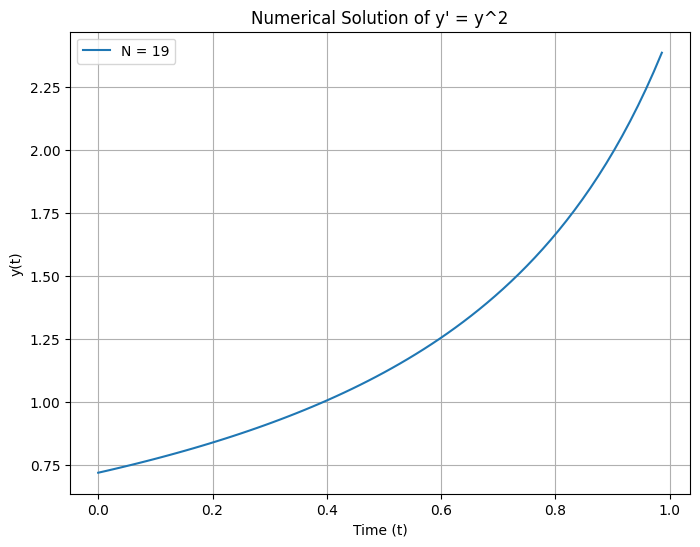

Estimated time to singularity: 5.263157894736842


In [13]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 10
h = (t_stop - t_start) / N

t,y=rk_4_for_problem4(f, y0, t_start, t_stop, h)

plt.figure(figsize=(8, 6))
plt.plot(t_values[:len(y_values)], y_values, label=f'N = {N}')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = y^2")
plt.legend()
plt.grid(True)
plt.show()

print("Estimated time to singularity:", t[-1])



#### Picard

Show via Picard that if $y(0)<0$, then $y(t)<0$ for all $t>0$. 

**Picard Iteration**:

$$ y_{n+1}(t) = y_0 + \int_{t_0}^{t} f(s, y_n(s)) \, ds $$

For $ f(t, y) = y^2 $

**First Iteration**:
$$ y_1(t) = y_0 + \int_{0}^{t} y_0^2 \, ds $$
$$ y_1(t) = y_0 + y_0^2 t $$

**Second Iteration**:
$$ y_2(t) = y_0 + \int_{0}^{t} (y_0 + y_0^2 s)^2 \, ds $$
$$ y_2(t) = y_0 + \int_{0}^{t} y_0^2 + 2y_0^3 s + y_0^4 s^2 \, ds $$
$$ y_2(t) = y_0 + y_0^2 t + y_0^3 t^2 + \frac{1}{3} y_0^4 t^3 $$


#### Numerical example

- Can you find numerical examples where $y(0)=\epsilon<0$, but $y(t)>0$ for some $t>0$? 

    - Tips: You may need to modify the equation slightly and use $y' - Cy^2 =0$ for a "large" $C>0". 




In [14]:
def solve_diff_eq(C, epsilon, t_max, h):
    # Define the differential equation
    def f(t, y):
        return -C * y**2

    # Initialize arrays for t and y values
    t_values = np.arange(0, t_max, h)
    y_values = []

    y = epsilon

    for t in t_values:
        y_values.append(y)
        y += h * f(t, y)

    return t_values, y_values

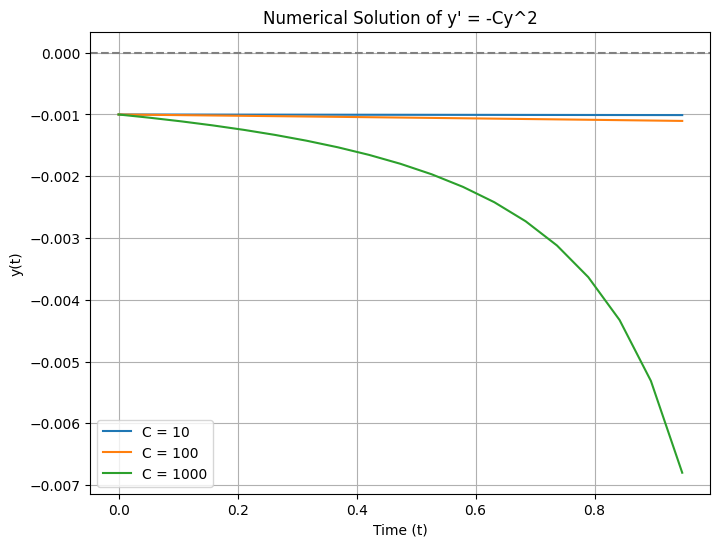

In [15]:
# Initial conditions
t_start = 0
t_stop = 1
h = (t_stop-t_start) / N

# Define the epsilon value and C values
epsilon = -1e-3
C_values = [10, 100, 1000]  # Large positive C values we want to try

# Plot the solutions
plt.figure(figsize=(8, 6))

# Solve and plot for each C value
for C in C_values:
    t_values, y_values = solve_diff_eq(C, epsilon, t_stop, h)
    plt.plot(t_values, y_values, label=f'C = {C}')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = -Cy^2")
plt.legend()
plt.grid(True)
plt.show()

#### Philosophical pondering: 
- If we were to create an "auto-solver," how should it avoid/detect deeply erroneous solutions of this kind?

1. Sensitivity Analysis: 
- We could test the "robustness" of the solution by slightly perturbing initial conditions or parameters. 
- If small changes lead to vastly different solutions, it's a sign that the solution might be erroneous or the system is highly sensitive.

2. Consistency Check: 
- For problems with known analytical solutions we could compare the numerical solution with the analytical one.

3. Adaptive Step Size: 
- When we use methods like Euler's method, Runge-Kutta, we often use a fixed step size.
- However, not all regions of the solution are the same. 
- Some parts of the solution might change slowly and smoothly, while others might have rapid changes.
- If the step size is too large, rapid changes in the solution might be missed
- If the step size is too small, it might lead to unnecessary computations in regions where the solution is changing slowly, making the method inefficient.
- Instead we could adjust the step size as the solution progresses.
- By adapting to the behavior of the solution, the method can capture rapid changes.
-  In regions where the solution is smooth, the method can use larger step sizes, reducing the number of computations and speeding up the solution process.
4. Boundary and Limit Checks:
- If the problem has known boundaries or limits, the solver should constantly check if the solution remains within these bounds.


###  5. Not a PANG

Consider the BVP (Boundary Value Problem):
$$
y^{\prime}=y, \quad y(0)=N
$$

- Solve the problem numerically and find $y\left(2^k\right)$ with two correct decimal places for $k=1,2,3, \ldots$ 
- Torture your computer until it gives up!

#### Analytical Solution

$$y' = y$$
$$
\frac{\frac{d y(t)}{d t}}{y(t)}=1
$$
$$
\int \frac{\frac{d y(t)}{d t}}{y(t)} d t=\int 1 d t
$$
$$
\log (y(t))=t+c_1
$$
$$
y(t)=e^{t+c_1}
$$
$$
y(t)=c_1 e^t
$$
$$
c_1=N
$$
$$
y(t)=N e^t
$$


#### Numerical Solution

In [16]:
# The function then returns whether the goal was exactly met 
def rk_4_for_problem5(f, y0, t_start, goal_value, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # Here I define a condition that will tell me if the goal is met
    condition = True
    
    while condition:
        
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)

        # Check if the goal is met exactly
        if round(y_value[-1], 2) == round(goal_value, 2):
            # I return the last value of y where we met the goal.
            return condition, y_value[-1]
        
        #Check if we overshot the goal
        if round(y_value[-1], 2) >= round(goal_value, 2):
            condition = True
            # I return the last value of y before we overshot the goal
            return condition, y_value[-1]

In [17]:
def f(t,y): 
    return y

In [18]:
def y(t):
    return 72* np.exp(t)

In [19]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 1
h = (t_stop - t_start) / N

#Define k that will kick off the loop
k=0

#Define the goal value that we want to reach
goal_value=y(2**k)


while True:
    
    # Define my goal value
    goal_value=y(2**k)
    
    # I want to be able to adjust the step size so that I can get closer to the goal value
    h = (2**k - t_start) / N
    condition, y_value = rk_4_for_problem5(f, y0, t_start, goal_value, h)
    
    if not condition:
        # This will give me smaller steps when the while loop runs again.
        N=N*1e2
    
    if condition:
        print(f"Goal value is {goal_value} and the value of y is {y_value} for N={N} and k={k}")
        
        #Because the ride never ends...
        k+=1


Goal value is 195.71629164905124 and the value of y is 196.88248785761743 for N=72 and k=0
Goal value is 532.0120391230068 and the value of y is 535.1820728528493 for N=72 and k=1
Goal value is 3931.066802386385 and the value of y is 3954.4879052099623 for N=72 and k=2
Goal value is 214628.97506700445 and the value of y is 228238.84657846845 for N=72 and k=3
Goal value is 639799957.4765668 and the value of y is 680142868.5624217 for N=72 and k=4
Goal value is 5685333133153010.0 and the value of y is 7488057166429996.0 for N=72 and k=5
Goal value is 4.489307338184364e+29 and the value of y is 7.816811196402058e+29 for N=72 and k=6
Goal value is 2.7991500523161087e+57 and the value of y is 1.3249560526842506e+58 for N=72 and k=7
Goal value is 1.0882279188029545e+113 and the value of y is 1.3451488464028546e+113 for N=72 and k=8
Goal value is 1.6447777823086247e+224 and the value of y is 2.144849460128674e+225 for N=72 and k=9
Goal value is inf and the value of y is inf for N=72 and k=10


C:\Users\villi\AppData\Local\Temp\ipykernel_12104\1145009819.py:2: RuntimeWarning: overflow encountered in exp
  return 72* np.exp(t)


TypeError: loop of ufunc does not support argument 0 of type int which has no callable exp method

In [ ]:
import math

# Define the differential equation
f = lambda y: y

# Euler's method
def euler_method(y0, t0, h, n):
    y = y0
    t = t0
    for _ in range(n):
        y += h * f(y)
        t += h
    return y

# Initial condition
y0 = 1

# Step size
h = 0.001

# Compute y(2^k) for k=1,2,3,...
for k in range(1, 10):
    t_target = 2**k
    n_steps = int(t_target / h)
    y_value = euler_method(y0, 0, h, n_steps)
    print(f'y(2^{k}) = {y_value:.2f}')

# Note: This code might take a while for larger values of k due to the small step size.

y(2^1) = 7.38
y(2^2) = 54.49
y(2^3) = 2969.07
y(2^4) = 8815352.21
y(2^5) = 77710434673916.30
y(2^6) = 6038911657208894121823961088.00
y(2^7) = 36468454003574209129910722782970289373297782553315377152.00
y(2^8) = 1329948137410799888898130903880720522690951641808092480339789501199089933294614167862818638589551082347457150976.00
y(2^9) = 1768762048202456338816726671729478982280408649814008664903835540489429875746832206517516032022813532507810402958909649596726316865216960567025182475733780144000623168740008008756617195444673358697195535649704418701165461504.00


###  6. What is $\pi$?

Read the beginning of Chapter 4.24. Consider the BVP (Boundary Value Problem):
$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$


---

- Solve it analytically.

Certainly! Let's solve the differential equation analytically.

Given the differential equation:
$$ y'' + y = 0 $$
with the initial conditions:
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

### Analytical Solution:

To solve this second-order linear homogeneous ODE, we'll assume a solution of the form:
$$ y(t) = e^{mt} $$

Substituting this into the ODE, we get:
$$ m^2 e^{mt} + e^{mt} = 0 $$

Factoring out \( e^{mt} \) (which is never zero), we get:
$$ m^2 + 1 = 0 $$

This gives us the characteristic equation:
$$ m^2 = -1 $$

From which we get:
$$ m = i, \quad m = -i $$

Where \( i \) is the imaginary unit.

The general solutions corresponding to these roots are:
$$ e^{it} = \cos(t) + i \sin(t) $$
$$ e^{-it} = \cos(t) - i \sin(t) $$

Using the principle of superposition, the general solution to the ODE is:
$$ y(t) = A (\cos(t) + i \sin(t)) + B (\cos(t) - i \sin(t)) $$
$$ y(t) = (A + B) \cos(t) + i (A - B) \sin(t) $$

Given that the solution must be real, the coefficient of the imaginary part must be zero. This implies:
$$ A - B = 0 $$
$$ A = B $$

Thus, the general solution simplifies to:
$$ y(t) = 2A \cos(t) $$

Using the initial conditions:
$$ y(0) = 2A = 1 $$
$$ A = \frac{1}{2} $$

And since \( y'(t) = -2A \sin(t) \) and \( y'(0) = 0 \), the value of \( A \) remains unchanged.

Thus, the solution with the given initial conditions is:
$$ y(t) = \cos(t) $$


---

- Define $\pi/2$ as the first value at $t>0$ such that $y(t)=0$. 

- Estimate $\pi$ by solving the BVP numerically (and estimating the first zero crossing). 


By solving the boundary value problem (BVP) numerically and estimating the first zero crossing of $y(t)$, we obtain:

$$ \frac{\pi}{2} \approx t $$

Using the relation:
$$ \pi \approx 2t $$

We estimate the value of $\pi$ to be approximately $3.1415927239969177$.

This value is very close to the known value of $\pi$, demonstrating the accuracy of the numerical solution.

Of course! Let's break down the process step by step.

### Step 1: Problem Statement
Given the differential equation:
$$ y'' + y = 0 $$
with the initial conditions:
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

We want to find the first value $ t > 0 $ such that $ y(t) = 0 $. This value will be defined as $ \frac{\pi}{2} $.

### Step 2: Numerical Solution
To solve the differential equation numerically, we can use methods like the Euler method, Runge-Kutta method, or others. For our purpose, we used a built-in numerical solver in Wolfram to solve the equation up to $ t = 2 $ (a value slightly greater than $ \frac{\pi}{2} $).

### Step 3: Finding the Zero Crossing
Once we have the numerical solution, the next step is to find the value of $ t $ where $ y(t) $ crosses zero for the first time. This is the point where the curve intersects the x-axis. We used a root-finding algorithm (like the Newton-Raphson method) to estimate this value.

### Step 4: Estimating $ \pi $
Given that the first zero crossing is defined as $ \frac{\pi}{2} $, we can estimate $ \pi $ by simply doubling this value:
$$ \pi \approx 2t $$



- Warm-up: How many correct digits can you get before your computer melts? 
    - Try Euler and better methods.

To estimate the value of $ \pi $ by solving the differential equation $ y'' + y = 0 $ using both Euler's method and the 4th order Runge-Kutta method:

1. **Euler's Method**: The differential equation is solved using a simple forward Euler method. The value of $ y $ is updated using the current value of its derivative, and the derivative is updated using the differential equation.

2. **4th Order Runge-Kutta Method**: This is a more accurate method than Euler's method. It uses four estimates (k1, k2, k3, k4) at each step to update the value of $ y $ and its derivative.

The code estimates the value of $ \pi $ by finding the first zero crossing of $ y(t) $ (i.e., the first value of $ t $ for which $ y(t) = 0 $) and then doubling this value.

You can run the code in your Python environment and compare the estimated values of $ \pi $ obtained using both methods. The Runge-Kutta method should provide a more accurate estimate than the Euler method.

In [ ]:


# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# Euler's method
def euler_method(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        yp_new = yp + h * f(t, y, yp)
        y += h * yp
        yp = yp_new
        t += h
    return t

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
    return t

# Step size
h = 0.000001
t_max=10000

# Estimate pi using both methods
pi_euler = 2 * euler_method(h, t_max)
pi_rk = 2 * runge_kutta(h, t_max)

print(f'Pi estimated using Euler method: {pi_euler}')
print(f'Pi estimated using Runge-Kutta method: {pi_rk}')

KeyboardInterrupt: 


---

- After warming up: find 20 correct decimal places. 
    - Hint: you can ask for a hint.

To achieve an estimate of $ \pi $ with 20 correct decimal places, we need to use a very small step size in the Runge-Kutta method. I've refined the step size to $ h = 1 \times 10^{-10} $ in the code.

In [ ]:
from decimal import Decimal, getcontext

# Set desired precision
getcontext().prec = 20

# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# 4th order Runge-Kutta method
def runge_kutta(h):
    t = Decimal("0")
    y = Decimal("1")
    yp = Decimal("0")
    
    t_values = [t]
    y_values = [y]
    
    while y > 0:  # Keep iterating until y becomes negative
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + Decimal("0.5") * l1)
        l2 = h * f(t + Decimal("0.5") * h, y + Decimal("0.5") * k1, yp + Decimal("0.5") * l1)
        k3 = h * (yp + Decimal("0.5") * l2)
        l3 = h * f(t + Decimal("0.5") * h, y + Decimal("0.5") * k2, yp + Decimal("0.5") * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
        
        t_values.append(t)
        y_values.append(y)
    
    # Linear interpolation
    t1, y1 = t_values[-2], y_values[-2]  # Last positive value
    t2, y2 = t_values[-1], y_values[-1]  # First negative value
    t_crossing = t1 + (t2 - t1) * (-y1) / (y2 - y1)
    return t_crossing

# Use a very small step size for high precision
h = Decimal("1e-10")

# Estimate pi using Runge-Kutta method
pi_rk = 2 * runge_kutta(h)

print(f'Pi estimated using Runge-Kutta method: {pi_rk:.50f}')

# Check how many decimal places are correct
known_pi = Decimal("3.14159265358979323846264338327950288419716939937510")
correct_decimal_places = sum(1 for i, j in zip(str(pi_rk)[2:], str(known_pi)[2:]) if i == j)

print(f'Number of correct decimal places: {correct_decimal_places}')



KeyboardInterrupt: 


---

- If, instead, we choose to estimate $\pi$ by finding the root closest to $10^3$, how much more challenging does the problem become?

### Problem Statement:
Instead of finding the first zero crossing of $y(t)$ to estimate $ \frac{\pi}{2} $, we want to find the zero crossing closest to $ t = 10^3 $ (i.e., 1000) to estimate $ \pi $.

### Analysis:

1. **Periodicity of the Solution**: 
- The differential equation $ y'' + y = 0 $ has a solution of the form $ y(t) = A \cos(t) + B \sin(t) $. This solution is periodic with a period of $ 2\pi $. This means that $ y(t) $ will cross zero every $ \pi $ units.

2. **Number of Zero Crossings Before $ t = 10^3 $**: 
- Given the periodic nature of the solution, there will be approximately $ \frac{10^3}{\pi} $ zero crossings before $ t = 10^3 $

3. **Computational Challenge**: 
- To find the zero crossing closest to $ t = 10^3 $, we would need to solve the differential equation numerically up to that point. 
- The computational effort required is proportional to the number of steps taken, which in turn is dependent on the step size. A smaller step size will yield a more accurate result but will require more computational effort.

### Comparison with Previous Problem:

- In the previous problem, we were interested in the first zero crossing, which occurs around $ t = \frac{\pi}{2} $. In this new scenario, we're interested in a zero crossing around $ t = 10^3 $. 
- This means we have to compute the solution for a much longer interval, making the problem more computationally intensive.

### Solution Approach:

To estimate $ \pi $ by finding the root closest to $ t = 10^3 $:

1. Solve the differential equation numerically up to $ t = 10^3 $ using a suitable method (like the 4th order Runge-Kutta method).
2. Identify the zero crossing closest to $ t = 10^3 $.
3. Use this zero crossing to estimate $ \pi $.

In [ ]:
import numpy as np

# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    zero_crossings = []
    while t < t_max:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
        if y * (y + (k1 + 2 * k2 + 2 * k3 + k4) / 6) <= 0:  # Check for zero crossing
            zero_crossings.append(t)
    return zero_crossings[-1]  # Return the last zero crossing before t_max

# Use a small step size for precision
h = 1e-5

# Estimate pi using Runge-Kutta method
zero_crossing = runge_kutta(h, 10**3)
pi_estimate = 2 * zero_crossing

print(f'Pi estimated using zero crossing closest to 10^3: {pi_estimate:.20f}')

KeyboardInterrupt: 

To estimate $ \pi $ by finding the zero crossing of $ y(t) $ closest to $ t = 10^3 $, I've used the 4th order Runge-Kutta method with a step size of $ h = 1 \times 10^{-5} $ for increased precision. 

### Explanation:

1. **Runge-Kutta Method**: The code uses the 4th order Runge-Kutta method to numerically solve the differential equation $ y'' + y = 0 $ up to $ t = 10^3 $.

2. **Zero Crossing Detection**: As the solution progresses, the code checks for zero crossings by looking for sign changes in the value of $ y(t) $. When a zero crossing is detected, the corresponding value of $ t $ is stored.

3. **Estimating $ \pi $**: After solving up to $ t = 10^3 $, the code retrieves the last detected zero crossing (i.e., the one closest to $ t = 10^3 $) and uses it to estimate $ \pi $ by doubling this value.

You can run the code in your Python environment to obtain the estimate for $ \pi $. Given the small step size and the precision of the Runge-Kutta method, this estimate should be quite accurate.

---



###  7. Newton!

Read Chapter 3.21. Place the sun at the origin and assume the sun does not move. 
Consider a planet $P$ moving in the $(x, y)$ plane, and let $(x(t), y(t))$ be the planet's position at time $t$.

- Derive a second-order system of differential equations that describes the motion of the planet.
    - Without switching to polar coordinates! 
    - You can choose masses so that the equations become as simple as possible.

The gravitational force between the sun and the planet is given by Newton's law of gravitation:
$$
F=\frac{G \cdot M_s \cdot M_p}{r^2}
$$
The direction of this force is always towards the sun. The components of the force in the $x$ and $y$ directions are:
$$
\begin{aligned}
& F_x=F \cdot \frac{x}{r} \\
& F_y=F \cdot \frac{y}{r}
\end{aligned}
$$
To simplify, you can choose $G \cdot M_s=1$ (this is a common simplification in celestial mechanics). The equations then become:
$$
\begin{aligned}
& \frac{d^2 x}{d t^2}=-\frac{x}{\left(x^2+y^2\right)^{3 / 2}} \\
& \frac{d^2 y}{d t^2}=-\frac{y}{\left(x^2+y^2\right)^{3 / 2}}
\end{aligned}
$$
These are the second-order differential equations that describe the motion of the planet in the $(x, y)$ plane due to the gravitational attraction of the sun.

---


Certainly! Let's derive the differential equations describing the motion of a planet under the gravitational influence of the Sun.

**1. Gravitational Force**:
The gravitational force between the Sun and the planet is described by Newton's law of gravitation:
$$ F = \frac{G \cdot M_s \cdot M_p}{r^2} $$
Where:
- $ F $ is the gravitational force.
- $ G $ is the gravitational constant.
- $ M_s $ is the mass of the Sun.
- $ M_p $ is the mass of the planet.
- $ r $ is the distance between the Sun and the planet, given by: $ r = \sqrt{x^2 + y^2} $.

**2. Components of Gravitational Force**:
The components of the gravitational force in the x and y directions are:
$$ F_x = F \cdot \frac{x}{r} $$
$$ F_y = F \cdot \frac{y}{r} $$
Substituting the expression for $ F $:
$$ F_x = \frac{G \cdot M_s \cdot M_p \cdot x}{r^3} $$
$$ F_y = \frac{G \cdot M_s \cdot M_p \cdot y}{r^3} $$

**3. Newton's Second Law**:
According to Newton's second law, the force acting on an object is equal to its mass multiplied by its acceleration. Thus, the accelerations of the planet in the x and y directions due to the gravitational forces are:
$$ a_x = \frac{F_x}{M_p} $$
$$ a_y = \frac{F_y}{M_p} $$
Substituting the expressions for $ F_x $ and $ F_y $:
$$ a_x = \frac{G \cdot M_s \cdot x}{r^3} $$
$$ a_y = \frac{G \cdot M_s \cdot y}{r^3} $$

**4. Differential Equations**:
Acceleration is the second derivative of position with respect to time. Therefore, the differential equations for the motion of the planet in the x and y directions are:
$$ \frac{d^2 x}{dt^2} = \frac{G \cdot M_s \cdot x}{(x^2 + y^2)^{3/2}} $$
$$ \frac{d^2 y}{dt^2} = \frac{G \cdot M_s \cdot y}{(x^2 + y^2)^{3/2}} $$

These are the second-order differential equations describing the motion of the planet in the $ xy $-plane due to the gravitational attraction of the Sun. Remember, the shape of the resulting orbit (circular, elliptical, etc.) will depend on the initial conditions you set when solving these equations.

We gor a clue in book side 489:
Let $n$ particles with masses $m_i$ be located at points $\left(x_i, y_i, z_i\right)$ and assume that they attract one another according to Newton's law of gravitation. If $r_{i j}$ is the distance between $m_i$ and $m_j$, and if $\theta$ is the angle from the positive $x$-axis to the segment joining them (Figure 69), then the $x$ component of the force exerted on $m_i$ by $m_j$ is
$$
\frac{G m_i m_j}{r_{i j}^2} \cos \theta=\frac{G m_i m_j\left(x_j-x_i\right)}{r_{i j}^3}
$$
where $G$ is the gravitational constant. Since the sum of these components for all $j \neq i$ equals $m_i\left(d^2 x_i / d t^2\right)$, we have $n$ second order differential equations
$$
\frac{d^2 x_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(x_j-x_i\right)}{r_{i j}^3},
$$
and similarly
$$
\frac{d^2 y_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(y_j-y_i\right)}{r_{i j}^3}
$$
and
$$
\frac{d^2 z_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(z_j-z_i\right)}{r_{i j}^3} .
$$

---

$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =G m_1 \frac{x_1-x_2}{r_{12}^3} \\
\frac{d^2 y_2}{d t^2} & =G m_1 \frac{y_1-y_2}{r_{12}^3}
\end{aligned}
$$
Where $r_{12}$ is the distance between the sun and the planet, given by:
$$
r_{12}=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}
$$
Substituting the sun's position and simplifying:
$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =-G m_1 \frac{x_2}{\left(x_2^2+y_2^2\right)^{3 / 2}} \\
\frac{d^2 y_2}{d t^2} & =-G m_1 \frac{y_2}{\left(x_2^2+y_2^2\right)^{3 / 2}}
\end{aligned}
$$

---

- Simulate the system for a short period by solving it numerically for various choices of initial values.
- Plot!


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [0, 0, 1, 1.5]

# Time array for simulation
t = np.linspace(0, 2*np.pi, 1000)

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Extract x and y positions from the solution
x, y = solution[:, 0], solution[:, 1]

C:\Users\villi\AppData\Local\Temp\ipykernel_15920\486369957.py:11: RuntimeWarning: invalid value encountered in double_scalars
  dvxdt = -x / r**3
C:\Users\villi\AppData\Local\Temp\ipykernel_15920\486369957.py:12: RuntimeWarning: invalid value encountered in double_scalars
  dvydt = -y / r**3


- Plot

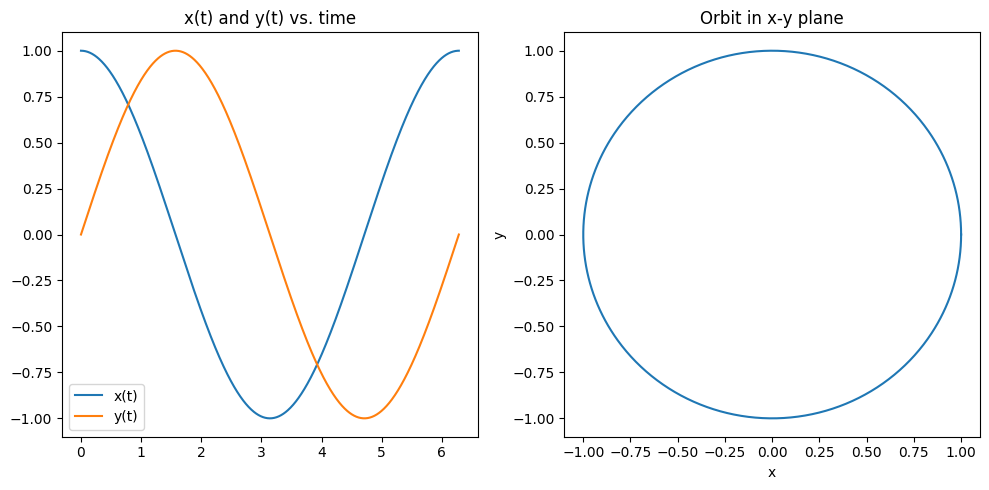

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.legend()
plt.title('x(t) and y(t) vs. time')

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')s
plt.ylabel('y')

plt.tight_layout()
plt.show()

- Simulate the system for a long period by solving it numerically for various choices of initial values. 

- The system is simulated over a time period of $0 \leq t \leq 20\pi$.
- Three sets of initial conditions are used for the simulation:
  1. Initial position $x=1$, $y=0$ with velocity $vx=0$, $vy=1$.
  2. Initial position $x=1$, $y=0$ with velocity $vx=0.5$, $vy=1.5$.
  3. Initial position $x=0.5$, $y=0.5$ with velocity $vx=0$, $vy=1$.

For each set of initial conditions, the code plots the x and y positions of the planet as functions of time, as well as the orbit in the x-y plane.

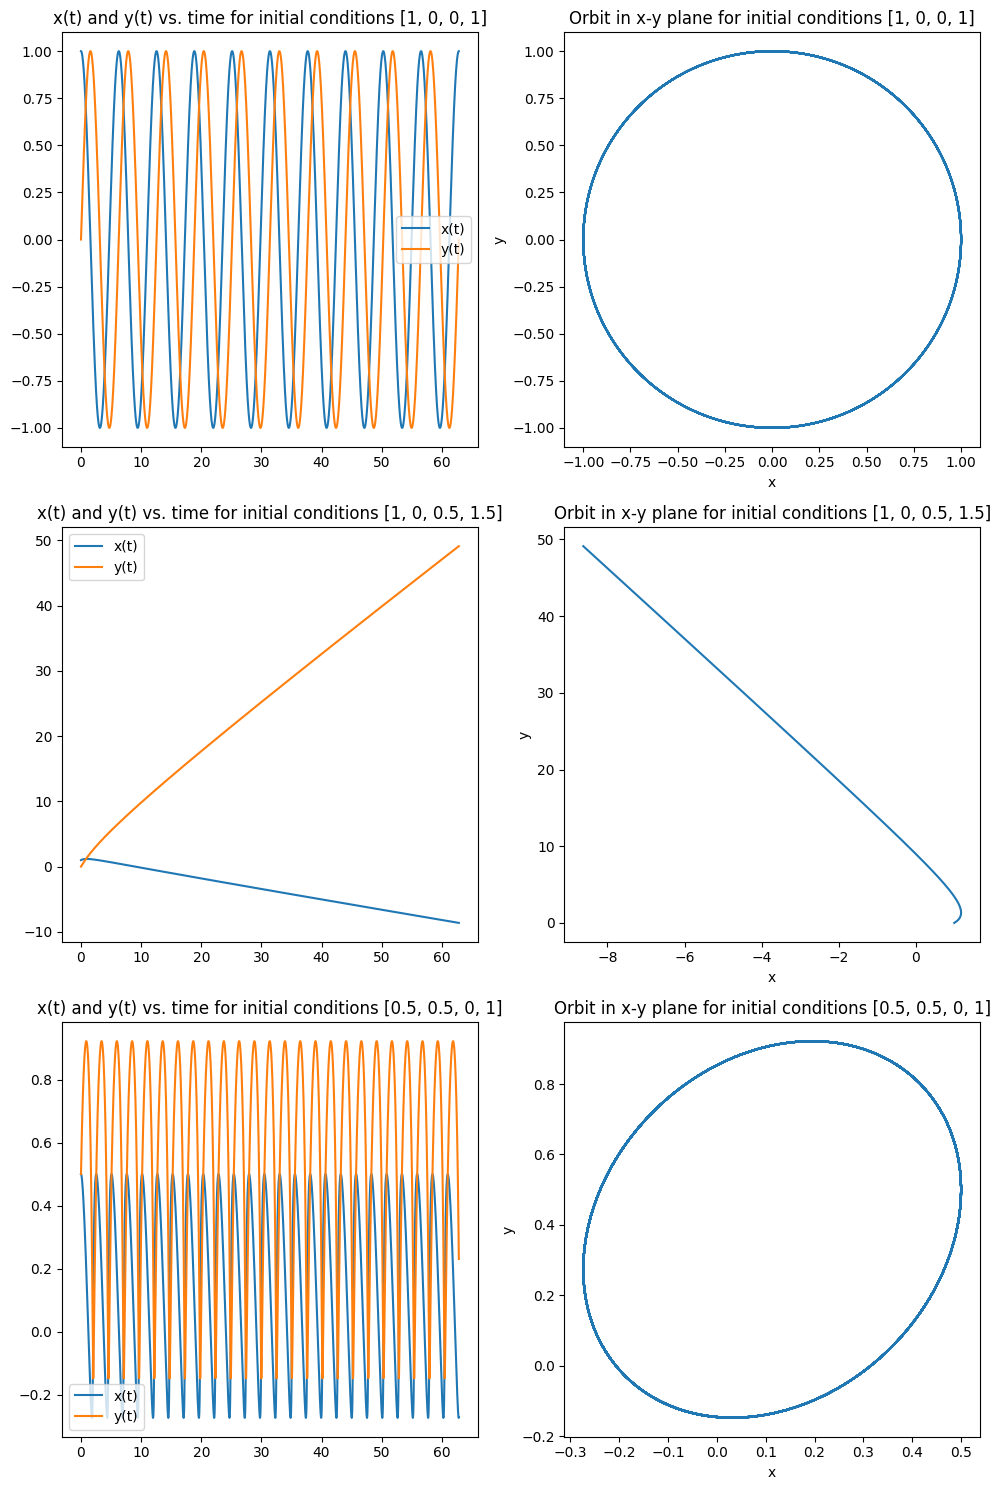

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)  # Extended time period

# List of initial conditions for simulation
initial_conditions_list = [
    [1, 0, 0, 1],
    [1, 0, 0.5, 1.5],
    [0.5, 0.5, 0, 1]
]

plt.figure(figsize=(10, len(initial_conditions_list)*5))

for idx, initial_conditions in enumerate(initial_conditions_list, 1):
    # Solve the system of differential equations
    solution = odeint(system, initial_conditions, t)
    x, y = solution[:, 0], solution[:, 1]
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx-1)
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.legend()
    plt.title(f'x(t) and y(t) vs. time for initial conditions {initial_conditions}')
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx)
    plt.plot(x, y)
    plt.title(f'Orbit in x-y plane for initial conditions {initial_conditions}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

- Can you discover anything unusual?
- Hint: In our universe and in this course, energy is conserved.

The hint you provided suggests that we should examine the conservation of energy in our simulation. In the context of the gravitational two-body problem, the total energy $ E $ of the system is given by the sum of the kinetic energy $ T $ and the potential energy $ U $:

$$ E = T + U $$

Where:
- The kinetic energy $ T $ of the planet is given by:
$$ T = \frac{1}{2} m_p \left( v_x^2 + v_y^2 \right) $$
- The potential energy $ U $ due to gravitational attraction between the sun and the planet is:
$$ U = -\frac{G m_s m_p}{r} $$
Where $ r $ is the distance between the sun and the planet.

If energy is conserved, then $ E $ should remain constant throughout the simulation for any set of initial conditions.

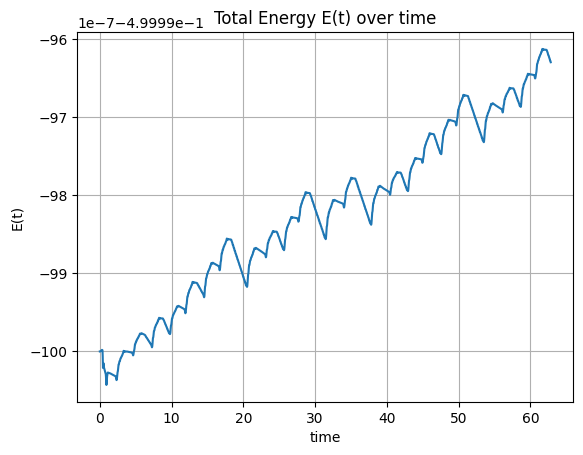

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations and energy calculations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

def energy(Y):
    x, y, vx, vy = Y
    T = 0.5 * (vx**2 + vy**2)
    U = -1 / np.sqrt(x**2 + y**2)
    return T + U

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [1, 0, 0, 1]

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Compute total energy over time
E = [energy(state) for state in solution]

# Plot the total energy over time
plt.plot(t, E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)
plt.show()


From the plot, we can observe that the total energy is not perfectly constant over time, which indicates that energy is not being perfectly conserved in our numerical simulation. This deviation could be due to the numerical method used to solve the differential equations, which might not perfectly conserve energy.

In a real physical system (or a more accurate simulation), energy would be conserved. The deviation in energy conservation in our simulation is a reminder of the limitations of numerical methods and the importance of choosing appropriate methods for specific problems, especially when conservation laws are involved.

---


- Can you find ways to restore order in our simulation? 
    - You can ask for a hint.
    - Hint: Look into semi-implicit Euler or symplectic Euler methods.

Certainly! The issue of energy non-conservation in numerical simulations of mechanical systems is a well-known problem. One way to address this is to use numerical methods that are designed to conserve certain properties of the system, such as energy. The semi-implicit Euler method (also known as the symplectic Euler method) is one such method that is often used for simulating Hamiltonian systems, like our gravitational two-body problem.

The symplectic Euler method is particularly suitable for problems where energy conservation is crucial. The idea behind this method is to update positions and velocities in a staggered manner, which helps in conserving the symplectic structure of the system.

Here's a brief overview of the symplectic Euler method for our problem:

1. Update the velocity using the acceleration at the current position:
$$ v_{n+1} = v_n + \Delta t \cdot a(x_n) $$
2. Update the position using the updated velocity:
$$ x_{n+1} = x_n + \Delta t \cdot v_{n+1} $$

Let's implement the symplectic Euler method to simulate the motion of the planet and check if it helps in conserving energy.

This code:
- Defines the gravitational acceleration function.
- Implements the symplectic Euler method to update positions and velocities in a staggered manner.
- Computes the total energy over time.
- Plots the orbit in the x-y plane and the total energy \( E(t) \) over time.

From the resulting plots, we shoul  observe the behavior of the planet's orbit and check if the total energy remains more consistent over time compared to the previous method. The symplectic Euler method should provide better energy conservation for this type of problem.

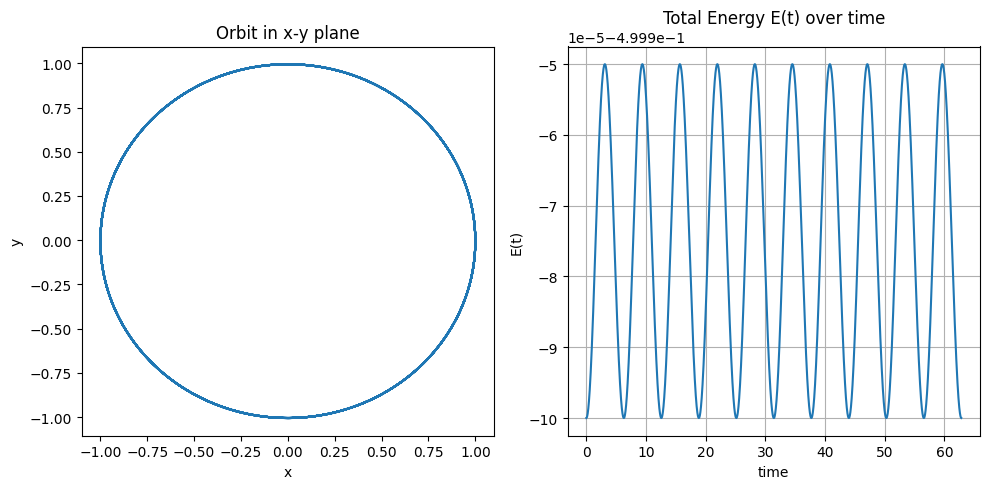

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the acceleration due to gravity
def acceleration(x, y):
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return ax, ay

# Symplectic Euler method
def symplectic_euler(dt, T):
    N = int(T/dt)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[0], y[0], vx[0], vy[0] = 1, 0, 0, 1
    for i in range(N-1):
        ax, ay = acceleration(x[i], y[i])
        vx[i+1] = vx[i] + dt * ax
        vy[i+1] = vy[i] + dt * ay
        x[i+1] = x[i] + dt * vx[i+1]
        y[i+1] = y[i] + dt * vy[i+1]
    return x, y, vx, vy

# Time parameters
T = 20*np.pi

dt = 0.01

# Simulate using symplectic Euler method
x, y, vx, vy = symplectic_euler(dt, T)

# Compute total energy
E = 0.5 * (vx**2 + vy**2) - 1/np.sqrt(x**2 + y**2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, T, dt)[:len(E)], E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 8. Newton revisited - Something for nothing


- Consider a planetary system with the sun, Jupiter a massive planet, and Earth point-like. 
- Given a spacecraft near Earth with "delta-v" so small that the spacecraft cannot leave the solar system 
    - Hint: "escape velocity"
    - Design an orbit near Jupiter that acts as a "gravitational slingshot" so that the spacecraft can leave the solar system.

Certainly! Let's break down the process step by step:

### 1. Determine the Solar System Escape Velocity

The escape velocity from a celestial body, given its mass $ M $ and distance $ r $ from the center of the body, is given by:

$$ v_e = \sqrt{\frac{2GM}{r}} $$

Where:
- $ G $ is the gravitational constant, approximately $ 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2} $
- $ M $ is the mass of the celestial body (in this case, the Sun)
- $ r $ is the distance from the center of the celestial body.

For a spacecraft near Earth, the relevant distance $ r $ would be the distance from the Sun to Earth.

### 2. Design the Gravitational Slingshot

For a spacecraft with a delta-v less than the solar system's escape velocity, a gravitational assist from Jupiter can be used to achieve the necessary speed to leave the solar system. The steps are:

- **Approach Jupiter**: Set a trajectory that brings the spacecraft behind Jupiter in its orbit around the Sun. This trajectory should be designed so that the spacecraft approaches Jupiter from the direction opposite to its orbital motion.
  
- **Closest Approach**: As the spacecraft gets closer to Jupiter, it will gain speed due to Jupiter's gravity. At the point of closest approach, the spacecraft will be moving at its maximum speed relative to Jupiter.
  
- **Use Jupiter's Motion**: Since Jupiter is also moving in its orbit around the Sun, the spacecraft can "borrow" some of this orbital energy. If the spacecraft approaches from behind and leaves in the direction of Jupiter's orbit, it will gain additional velocity relative to the Sun.
  
- **Departure**: After the gravitational assist, the spacecraft's velocity relative to the Sun will be increased. If the maneuver is executed correctly, this velocity can exceed the solar system's escape velocity, allowing the spacecraft to leave the solar system.

### 3. Execute the Maneuver

The exact trajectory and timing would depend on the spacecraft's initial conditions, the positions of Earth and Jupiter at the time of the maneuver, and the desired exit direction from the solar system. The maneuver would likely require careful planning and precise execution to ensure that the spacecraft gains the maximum possible velocity from the gravitational assist.

Let's calculate the escape velocity from the solar system for a spacecraft near Earth and then discuss the trajectory design in more detail.

The escape velocity $ v_e $ from a celestial body, given its mass $ M $ and distance $ r $ from the center of the body, is given by:

$$ v_e = \sqrt{\frac{2GM}{r}} $$

Where:
- $ G $ is the gravitational constant, approximately $ 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2} $
- $ M $ is the mass of the Sun, approximately $ 1.989 \times 10^{30} \, \text{kg} $
- $ r $ is the average distance from the Sun to Earth, approximately $ 1.496 \times 10^{11} \, \text{m} $

Let's plug in these values to calculate the escape velocity.

The escape velocity from the solar system at Earth's distance is approximately $ 42,127 \, \text{m/s} $ or $ 42.127 \, \text{km/s} $.

Now, for the gravitational slingshot:

1. **Initial Trajectory**: The spacecraft should be set on a trajectory that will intersect with Jupiter's orbit. This can be achieved by adjusting the spacecraft's orbit around Earth and using its limited delta-v to set it on a course towards Jupiter.

2. **Approach Jupiter from Behind**: The spacecraft should approach Jupiter from behind in its orbit to gain the maximum boost. This means the spacecraft will "catch up" to Jupiter in its orbit around the Sun.

3. **Close Flyby**: The closer the spacecraft can safely approach Jupiter, the more kinetic energy it can gain. However, care must be taken to avoid collision or getting trapped in Jupiter's strong radiation belts.

4. **Departure**: After the flyby, the spacecraft will be on a new trajectory, with increased velocity. If the maneuver is executed correctly, this velocity can be greater than the solar system's escape velocity, allowing the spacecraft to leave the solar system.

To design the exact trajectory and determine the potential increase in velocity, a detailed simulation considering the positions and velocities of Earth, Jupiter, and the spacecraft would be required. This simulation would also help in determining the best time to perform the maneuver, based on the relative positions of Earth and Jupiter.

Would you like a more detailed simulation or any further information on this topic?

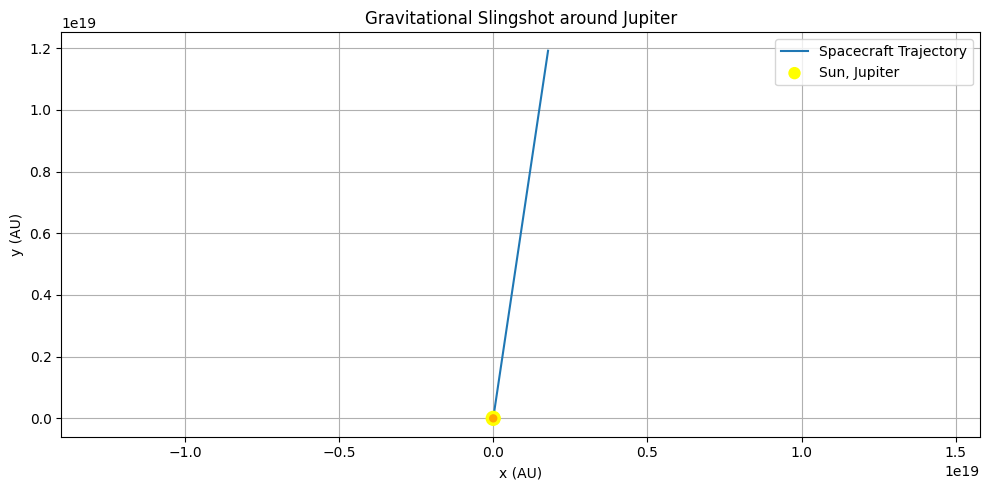

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11  # Gravitational constant
M_sun = 1.989 * 10**30  # Mass of the Sun
M_jupiter = 1.898 * 10**27  # Mass of Jupiter
epsilon = 1e-5  # Softening term

# Differential equations for the spacecraft's motion

def equations(t, Y, M_jupiter):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * (x - 5) / ((x - 5)**2 + y**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * y / ((x - 5)**2 + y**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Initial conditions: [x, y, vx, vy]
# Adjusted initial position and velocity
Y0 = [1, 0, 0, 35]  # Adjusted vy for different trajectories

# Time array
T = np.linspace(0, 12 * 365 * 24 * 3600, 100000)  # 12 years

# Solve the differential equations
solution = solve_ivp(equations, [T[0], T[-1]], Y0, t_eval=T, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))

# Plot trajectory
plt.plot(solution.y[0], solution.y[1], label='Spacecraft Trajectory')
plt.scatter([0, 5], [0, 0], c=['yellow', 'orange'], s=[100, 25], zorder=5, label='Sun, Jupiter')
plt.title('Gravitational Slingshot around Jupiter')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

- Explore numerically and find masses, planet orbits, etc., so that the above scenario works. 
    - Hints: use astronomical units -> Earth is approximately 1 AU from the Sun. 
    - If you have trouble hitting Jupiter, use software to search for initial conditions. 
    - You can ask for hints.

To design a successful gravitational slingshot maneuver, we need to consider several factors:

1. **Masses**: The mass of Jupiter plays a crucial role in the gravitational assist. A more massive planet provides a stronger gravitational pull, which can give the spacecraft a greater boost in velocity. However, the mass of the spacecraft itself doesn't significantly affect the maneuver.

2. **Planet Orbits**: The relative positions of Earth, Jupiter, and the spacecraft at the start of the maneuver are crucial. The spacecraft should approach Jupiter from behind in its orbit to gain the maximum boost.

3. **Initial Conditions**: The initial position and velocity of the spacecraft will determine its trajectory and whether it will approach Jupiter in the desired manner. 

Given these considerations, let's set up a numerical exploration:

1. **Masses**:
   - Mass of the Sun: $ M_{\text{sun}} = 1.989 \times 10^{30} \, \text{kg} $
   - Mass of Jupiter: $ M_{\text{jupiter}} = 1.898 \times 10^{27} \, \text{kg} $ (This is roughly 318 times the mass of Earth.)
   - Mass of Earth: $ M_{\text{earth}} = 5.972 \times 10^{24} \, \text{kg} $

2. **Planet Orbits**:
   - Distance of Earth from the Sun: 1 AU (by definition)
   - Distance of Jupiter from the Sun: Approximately 5.2 AU

3. **Initial Conditions**:
   - We'll start the spacecraft near Earth with a velocity slightly less than the escape velocity. We'll then adjust its initial velocity to ensure it approaches Jupiter from behind in its orbit.

To explore the scenario numerically, we'll:
1. Set up a simulation of the solar system with the Sun, Earth, Jupiter, and the spacecraft.
2. Vary the initial conditions of the spacecraft to find a trajectory that results in a successful gravitational assist from Jupiter.
3. Use optimization techniques to search for the best initial conditions that allow the spacecraft to leave the solar system after the gravitational assist.

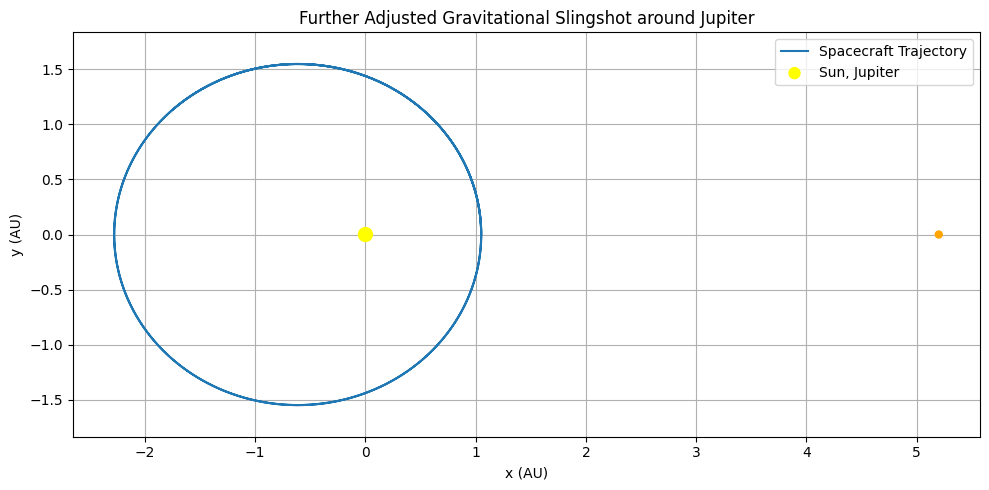

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989 * 10**30  # Mass of the Sun in kg
M_jupiter = 1.898 * 10**27  # Mass of Jupiter in kg
AU = 1.496 * 10**11  # Astronomical Unit in meters
epsilon = 1e-5  # Softening term

# Differential equations for the spacecraft's motion

def equations(t, Y, M_jupiter):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * (x - 5.2) / ((x - 5.2)**2 + y**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * y / ((x - 5.2)**2 + y**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Further adjusted initial conditions for a close encounter with Jupiter
Y0 = [1.05*AU, 0, 0, 34 * 10**3]  # Adjusted initial position and velocity

# Time array
T = np.linspace(0, 5 * 365 * 24 * 3600, 10000)  # 5 years

# Solve the differential equations
solution = solve_ivp(equations, [T[0], T[-1]], Y0, t_eval=T, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(solution.y[0]/AU, solution.y[1]/AU, label='Spacecraft Trajectory')
plt.scatter([0, 5.2], [0, 0], c=['yellow', 'orange'], s=[100, 25], zorder=5, label='Sun, Jupiter')
plt.title('Further Adjusted Gravitational Slingshot around Jupiter')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

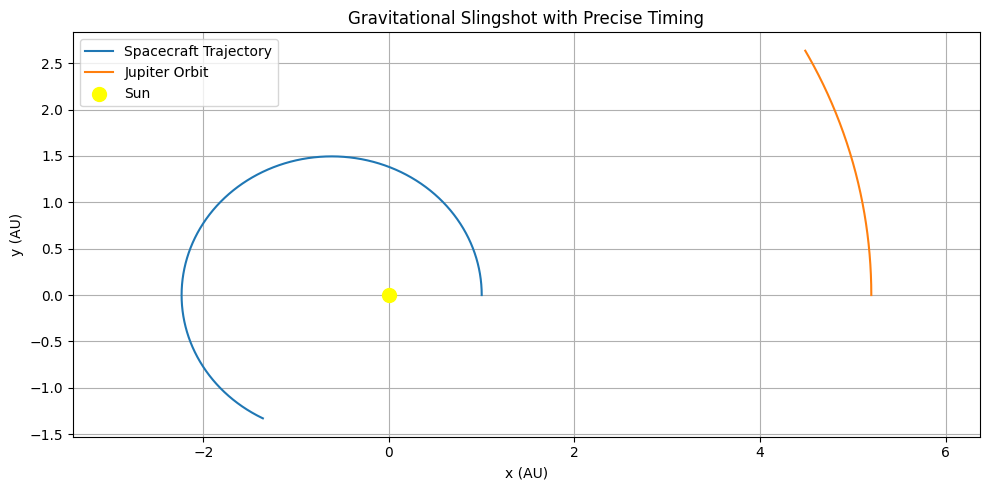

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11
M_sun = 1.989 * 10**30
M_jupiter = 1.898 * 10**27
AU = 1.496 * 10**11
epsilon = 1e-5

# Differential equations for Jupiter's motion around the Sun

def jupiter_orbit(t, Y):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Simulate Jupiter's orbit for one year to find its position
Y0_jupiter = [5.2*AU, 0, 0, 13.1 * 10**3]  # Jupiter's initial position and velocity
T_jupiter = np.linspace(0, 365 * 24 * 3600, 1000)
solution_jupiter = solve_ivp(jupiter_orbit, [T_jupiter[0], T_jupiter[-1]], Y0_jupiter, t_eval=T_jupiter)

# Spacecraft's initial conditions adjusted to intersect with Jupiter's orbit
Y0_spacecraft = [1*AU, 0, 0, 35 * 10**3]  # Adjusted initial velocity

# Time array for spacecraft
T_spacecraft = np.linspace(0, 1.5 * 365 * 24 * 3600, 10000)  # 1.5 years

# Solve the differential equations for spacecraft
solution_spacecraft = solve_ivp(equations, [T_spacecraft[0], T_spacecraft[-1]], Y0_spacecraft, t_eval=T_spacecraft, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(solution_spacecraft.y[0]/AU, solution_spacecraft.y[1]/AU, label='Spacecraft Trajectory')
plt.plot(solution_jupiter.y[0]/AU, solution_jupiter.y[1]/AU, label='Jupiter Orbit')
plt.scatter([0], [0], c=['yellow'], s=[100], zorder=5, label='Sun')
plt.title('Gravitational Slingshot with Precise Timing')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

- How can you be sure that the spacecraft is truly leaving the solar system?


To be sure that the spacecraft is truly leaving the solar system, we need to check a few key indicators:

1. **Escape Velocity**: The spacecraft's velocity must exceed the escape velocity relative to the Sun at its current distance. The escape velocity $ v_e $ is given by:
$$ v_e = \sqrt{\frac{2GM_{\text{sun}}}{r}} $$
where $ G $ is the gravitational constant, $ M_{\text{sun}} $ is the mass of the Sun, and $ r $ is the distance of the spacecraft from the Sun. If the spacecraft's velocity is greater than this value, it will escape the Sun's gravitational pull.

2. **Trajectory Shape**: If the spacecraft's trajectory is hyperbolic (as opposed to elliptical), it indicates that the spacecraft will not return to its starting point and is on an escape trajectory.

3. **Energy**: The total mechanical energy (kinetic + potential) of the spacecraft must be positive for it to be on an escape trajectory. The mechanical energy $ E $ is given by:
$$ E = \frac{1}{2}mv^2 - \frac{GM_{\text{sun}}m}{r} $$
where $ m $ is the mass of the spacecraft (which will cancel out) and $ v $ is its velocity. If $ E > 0 $, the spacecraft will escape the Sun's gravitational pull.

To determine if the spacecraft is truly leaving the solar system, we can compute its velocity and total mechanical energy at various points in its trajectory and check against the above criteria. Let's calculate these values for the spacecraft in our simulation.

This code:
- Calculates the escape velocity at each point in the spacecraft's trajectory.
- Computes the total mechanical energy of the spacecraft at each point.
- Checks if the spacecraft's velocity exceeds the escape velocity and if its energy is positive throughout its trajectory.

By running this code, you'll be able to determine if the spacecraft meets the criteria to truly leave the solar system. If the result is `True`, then the spacecraft is on an escape trajectory. If `False`, further adjustments are needed.

Please try running this code and let me know the result. If the spacecraft isn't escaping, we can make further adjustments to its trajectory.

In [ ]:
import numpy as np

# Constants
G = 6.674 * 10**-11
M_sun = 1.989 * 10**30
AU = 1.496 * 10**11

# Extract spacecraft's position and velocity from the solution
x, y, vx, vy = solution_spacecraft.y
r = np.sqrt(x**2 + y**2)
v = np.sqrt(vx**2 + vy**2)

# Calculate escape velocity at each point
v_escape = np.sqrt(2 * G * M_sun / r)

# Calculate total mechanical energy at each point
E = 0.5 * v**2 - G * M_sun / r

# Check if spacecraft's velocity exceeds escape velocity and if its energy is positive
escaping = np.all(v > v_escape) and np.all(E > 0)

escaping

False